In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

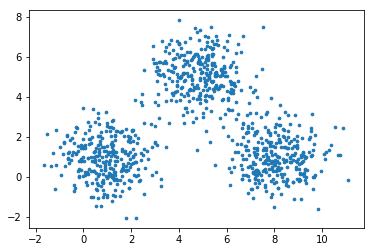

In [21]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])
data_1 = np.random.randn(300, 2) + center_1
data_2 = np.random.randn(300,2) + center_2
data_3 = np.random.randn(300,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

In [25]:

def K_means_home_made(X, k):
    '''
    K means with input K
    Normalize X first wrt to each d

K-means does not minimize Euclidean distances.

This is a common misconception that even half of the professors get wrong. 
K-means minimizes the sum-of-squares, i.e., the sum of squared Euclidean distances. 
And no, this does not find the solution with the smallest Euclidean distances.

As for K-means, often it is not sufficient to normalize only mean. 
One normalizes data equalizing variance along different features as K-means is sensitive to variance in data, 
and features with larger variance have more emphasis on result. 
So for K-means, I would recommend using StandardScaler for data preprocessing.

Don't forget also that k-means results are sensitive to the order of observations, 
and it is worth to run algorithm several times, shuffling data in between, 
averaging resulting clusters and running final evaluations with those averaged clusters centers as starting points.


(1) random sample k centroids
(2) for each data point, calculate inertia wrt to each centroids,
    The K-means algorithm aims to choose centroids that minimise the inertia, 
    or within-cluster sum of squared criterion
    
(3) assign the data point with the closest centroids
(4) for data points with the same centroids, calculate the mean, and set it to be the new centroid
(5) repeat (2-4) until the assignment doesn't change
    '''
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X = np.array(X) # m*d
        
#     m = X.shape[0]
#     d = X.shape[1]

#     max_iter = 1000
#     itera = 0
#     error = 1
#     centr = np.random.random((k,d))
#     iner = np.zeros((m,k))
#     new_centr = np.zeros((k,d))
    
#     while error > 0 and itera < max_iter:

#         for i,c in enumerate(centr):
#             iner[:,i] = np.sum((X-c)**2, axis = 1)

#         clusters = np.argmin(iner, axis = 1)   #return the index of the closest centroid, cluster : m*1, each row [0,k)

#         for j in range(k):
#             new_centr[j] = np.mean(X[clusters == j], axis = 0)

#         error = np.sum((centr - new_centr)**2)
#         centr = new_centr.copy()
#         itera += 1
#         print(itera, error)

#     return clusters

    centr = np.random.random((k,X.shape[1])) # k
    new_centr = np.zeros((k, X.shape[1]))
    error = 1
    iter = 0
    while error > 0 and iter <= 1000:

        inertia = np.zeros((X.shape[0],k))
        for i in range(k):
            inertia[:,i] = np.sum(np.square(X - centr[i]), axis = 1)# inertia: m*k
        clusters = np.argmin(inertia, axis = 1) # m
        
        for i in range(k):
            new_centr[i] = np.mean(X[clusters == i], axis = 0) # centr: k

        error = np.sum(np.square(centr-new_centr))
        centr = new_centr.copy()
        iter += 1
        print(iter,error)
       
    return clusters

In [26]:
labels = K_means_home_made(data, 3)

1 3.887308895484462
2 0.4036032932580392
3 0.014388799302225443
4 2.9682918442689867e-05
5 0.0


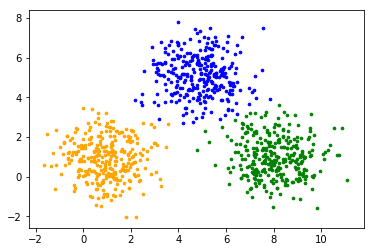

In [27]:
colors=['orange', 'blue', 'green']
for i in range(len(data)):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(labels[i])])

#plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

# compare with Sklearn

In [15]:

scaler = StandardScaler()
X = scaler.fit_transform(data)
X = np.array(X) # m*d
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

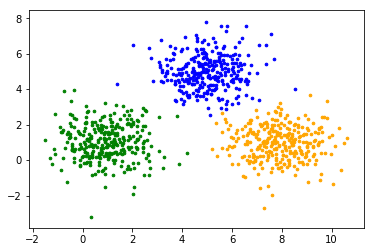

In [16]:
for i in range(len(data)):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(labels[i])])